# **Breath sounds**

In [ ]:
!pip install resampy

In [ ]:
!pip install praat-parselmouth

In [ ]:
!pip install pydub

In [ ]:
!apt-get install -y portaudio19-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
portaudio19-dev is already the newest version (19.6.0-1.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
!pip install pyaudio

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import glob
import fnmatch
import pandas as pd
import numpy as np
import resampy
import librosa #To deal with sound
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from scipy.signal import butter, filtfilt

In [ ]:
data_path = "/content/drive/MyDrive/lung-dataset/Dataset Audio(val)"

In [ ]:
tarin_data = data_path +"/train/"
val_data   = data_path + "/val/"

train_Normal_data   = tarin_data + '/Normal/'
train_Asthma_data = tarin_data + '/Asthma/'
train_Bronkitis_data   = tarin_data + '/Bronkitis/'
train_Pneumonia_data = tarin_data + '/Pneumonia/'
val_Normal_data     = val_data   + '/Normal/'
val_Asthma_data   = val_data   + '/Asthma/'
val_Bronkitis_data     = val_data   + '/Bronkitis/'
val_Pneumonia_data   = val_data   + '/Pneumonia/'

In [ ]:
print(os.listdir(data_path))

['train', 'val']


In [ ]:
print(len(os.listdir(train_Normal_data))) #length of Normal training sounds
print(len(os.listdir(train_Asthma_data))) #length of Asthma training sounds
print(len(os.listdir(train_Bronkitis_data))) #length of Bronkitis training sounds
print(len(os.listdir(train_Pneumonia_data))) #length of Pneumonia training sounds
print('TOTAL TRAIN SOUNDS:', len(os.listdir(train_Normal_data)) + len(os.listdir(train_Asthma_data)) + len(os.listdir(train_Bronkitis_data)) + len(os.listdir(train_Pneumonia_data)))

105
99
95
97
TOTAL TRAIN SOUNDS: 396


# EDA and Visualization

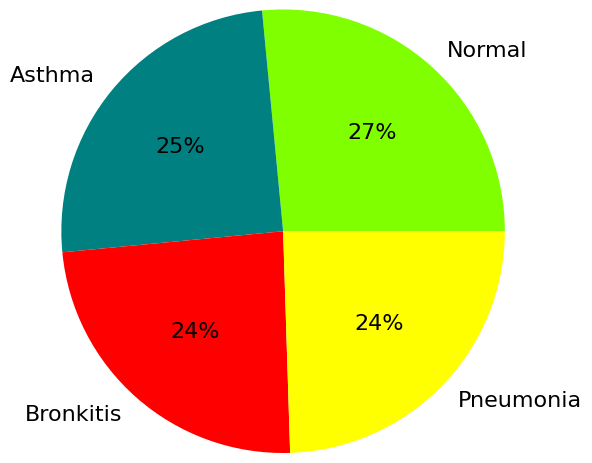

In [ ]:
x = np.array([len(os.listdir(train_Normal_data)),len(os.listdir(train_Asthma_data)),len(os.listdir(train_Bronkitis_data)),len(os.listdir(train_Pneumonia_data))])
labels = ['Normal', 'Asthma', 'Bronkitis', 'Pneumonia']
colors = {'Normal': 'chartreuse','Asthma': 'teal','Bronkitis': 'red','Pneumonia': 'yellow'  }
plt.pie(x, labels = labels, autopct = '%.0f%%', radius= 1.5, colors = [colors[key] for key in labels], textprops={'fontsize': 16})
plt.show()

## *NORMAL*

In [ ]:
# Choose random soud from Normal folder
random_Normal= np.random.randint(0,len(os.listdir(train_Normal_data)))
Normal_sound = os.listdir(train_Normal_data)[random_Normal]
Normal_sound_address = train_Normal_data+Normal_sound
Normal_sound_sample,sample_rate = librosa.load(Normal_sound_address)
ipd.Audio(Normal_sound_sample,rate=sample_rate)

### Waveform

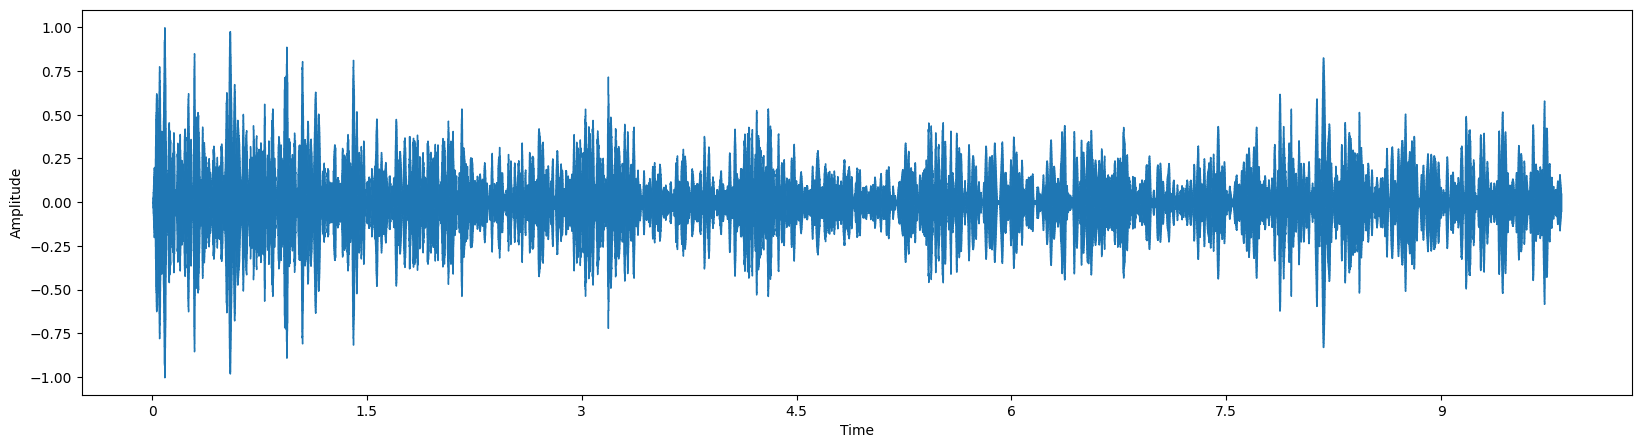

In [ ]:
plt.figure(figsize=(20,5))
librosa.display.waveshow(Normal_sound_sample, sr = sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

### Spectrum

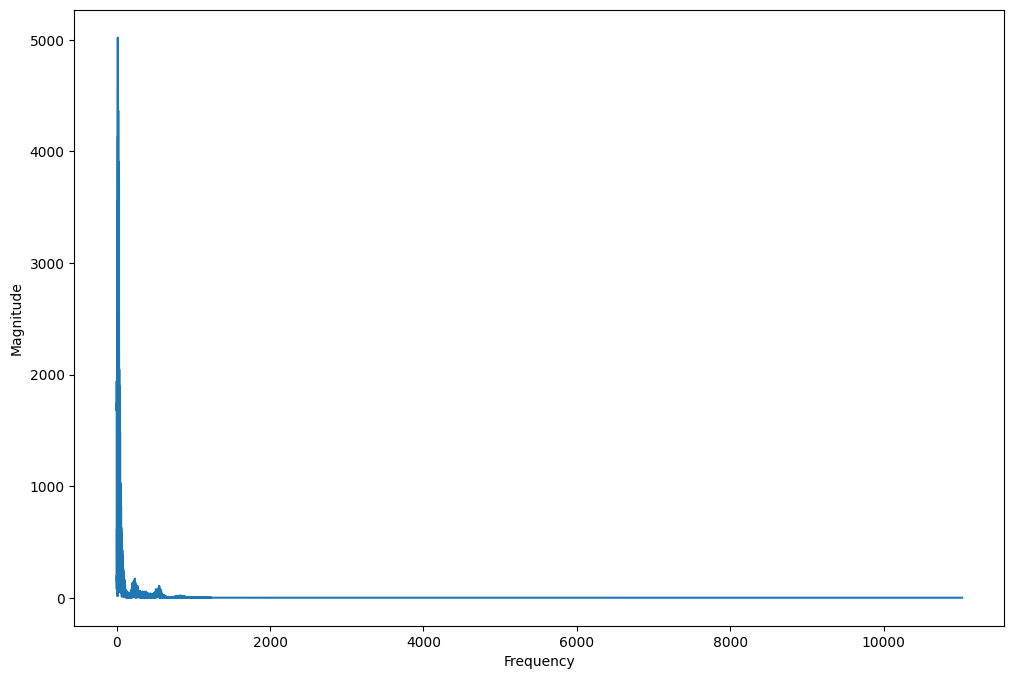

In [ ]:
fft_Normal = np.fft.fft(Normal_sound_sample)
magnitude_Normal = np.abs(fft_Normal)
freq_Normal = np.linspace(0,sample_rate, len(magnitude_Normal))
half_freq = freq_Normal[:int(len(freq_Normal)/2)]
half_magnitude = magnitude_Normal[:int(len(freq_Normal)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq,half_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

### Spectogram

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram')

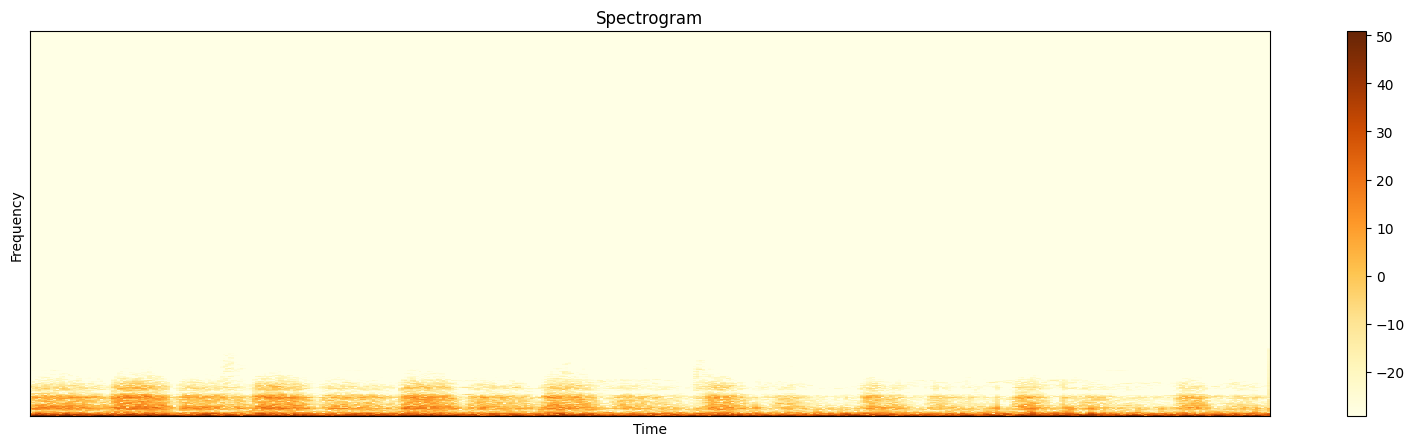

In [ ]:
# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft_Normal = librosa.stft(Normal_sound_sample, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft_Normal)
log_spectrogram = librosa.amplitude_to_db(spectrogram)

# display spectrogram
plt.figure(figsize=(20,5))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.set_cmap("YlOrBr")
plt.title("Spectrogram")

### MFCCs

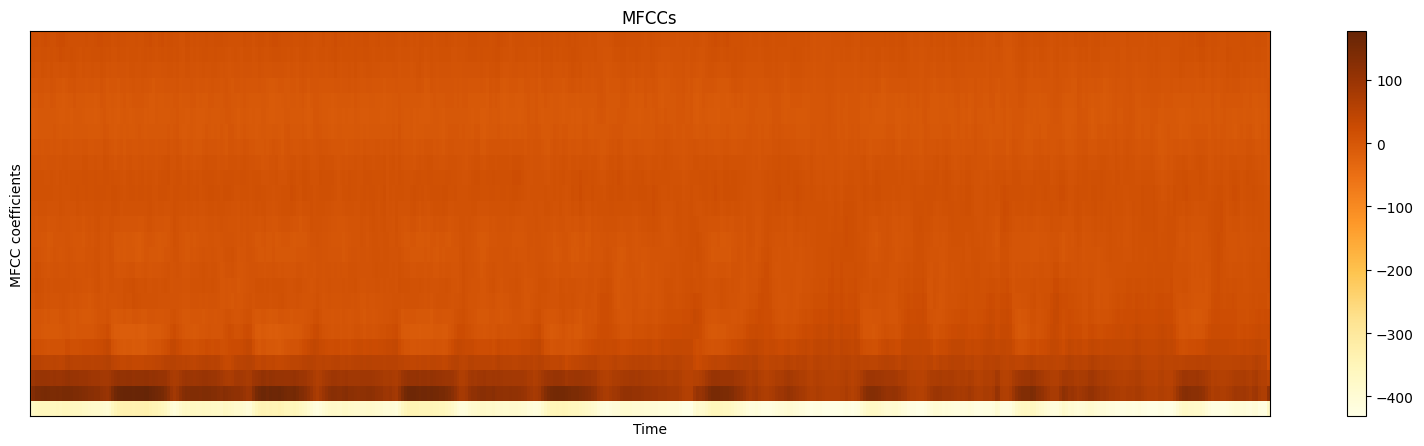

In [ ]:
# MFCCs
# extract 25 MFCCs
MFCCs = librosa.feature.mfcc(y=Normal_sound_sample, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

# display MFCCs
plt.figure(figsize=(20,5))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.set_cmap("YlOrBr")
plt.title("MFCCs")

# show plots
plt.show()

## Asthma

In [ ]:
# Choose random soud from Asthma folder
random_Asthma= np.random.randint(0,len(os.listdir(train_Asthma_data)))
Asthma_sound = os.listdir(train_Asthma_data)[random_Asthma]
Asthma_sound_address = train_Asthma_data+Asthma_sound
Asthma_sound_sample,sample_rate = librosa.load(Asthma_sound_address)
ipd.Audio(Asthma_sound_sample,rate=sample_rate)

### Waveform

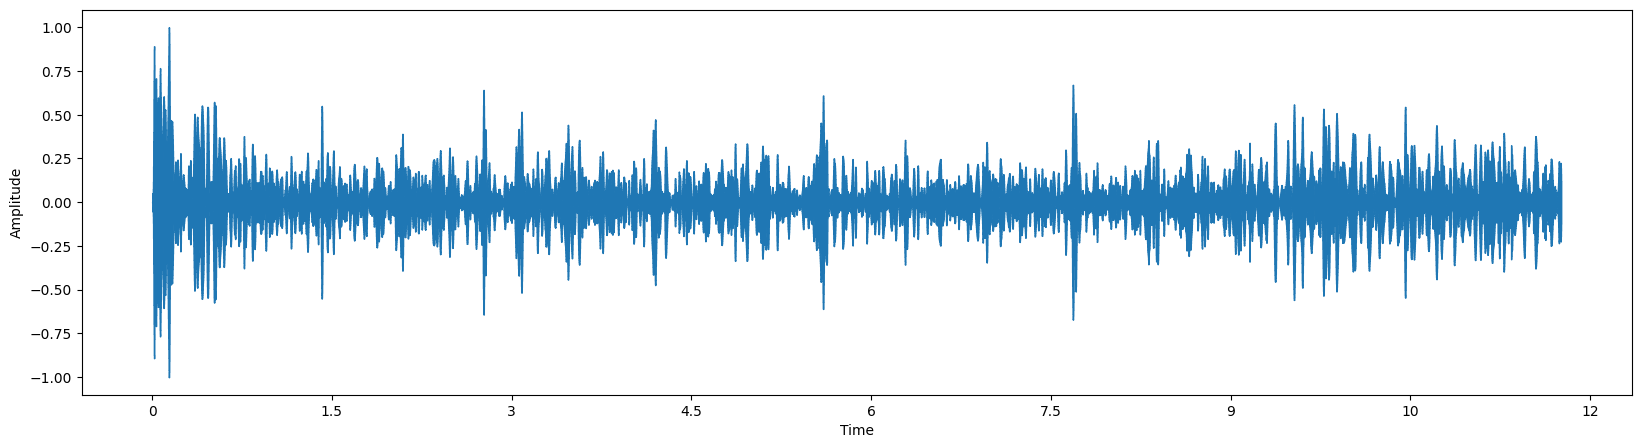

In [ ]:
plt.figure(figsize=(20,5))
librosa.display.waveshow(Asthma_sound_sample, sr = sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

### Spectrum

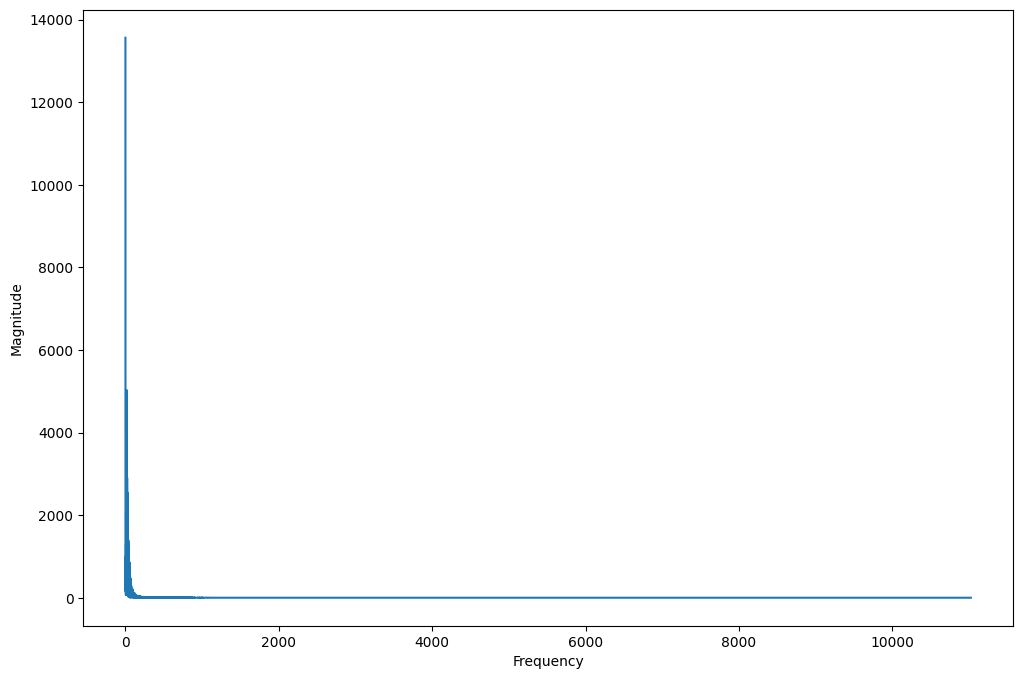

In [ ]:
fft_Asthma = np.fft.fft(Asthma_sound_sample)
magnitude_Asthma = np.abs(fft_Asthma)
freq_Asthma = np.linspace(0,sample_rate, len(magnitude_Asthma))
half_freq = freq_Asthma[:int(len(freq_Asthma)/2)]
half_magnitude = magnitude_Asthma[:int(len(freq_Asthma)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq,half_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

### Spectogram

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram')

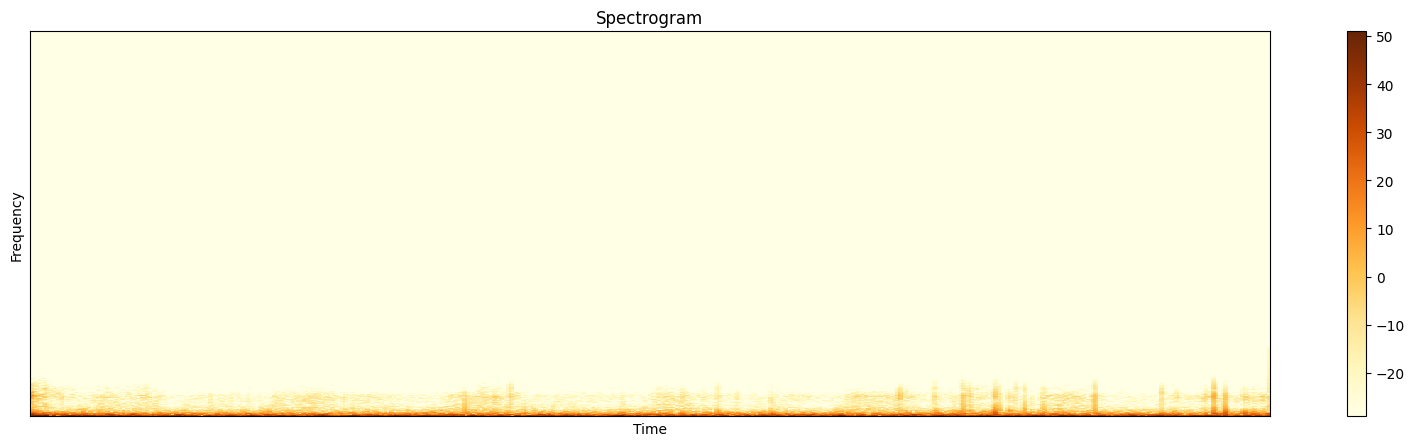

In [ ]:
# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft_Asthma = librosa.stft(Asthma_sound_sample, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft_Asthma)
log_spectrogram = librosa.amplitude_to_db(spectrogram)

# display spectrogram
plt.figure(figsize=(20,5))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.set_cmap("YlOrBr")
plt.title("Spectrogram")

### MFCCs

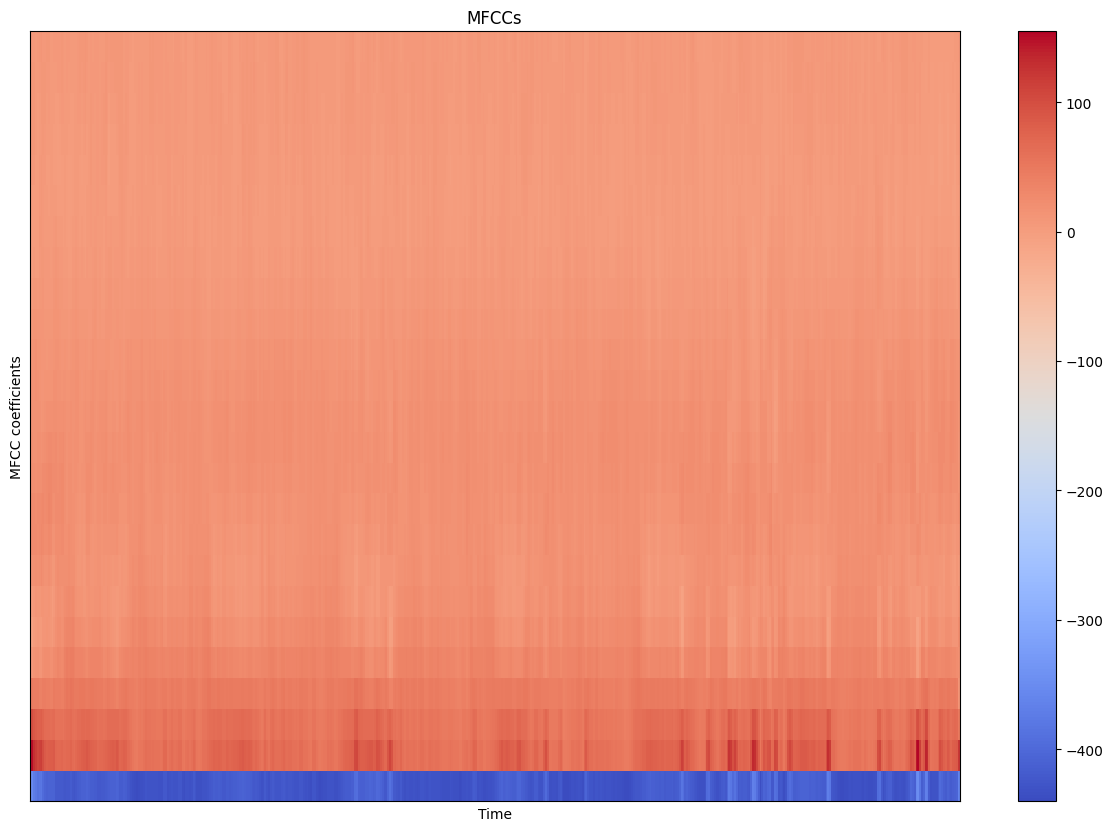

In [ ]:
# MFCCs
# extract 25 MFCCs
MFCCs = librosa.feature.mfcc(y=Asthma_sound_sample, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

# display MFCCs
plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
#plt.set_cmap("YlOrBr")
plt.title("MFCCs")

# show plots
plt.show()

## BRONKITIS

In [ ]:
# Choose random soud from Bronkitis folder
random_Bronkitis= np.random.randint(0,len(os.listdir(train_Bronkitis_data)))
Bronkitis_sound = os.listdir(train_Bronkitis_data)[random_Bronkitis]
Bronkitis_sound_address = train_Bronkitis_data+Bronkitis_sound
Bronkitis_sound_sample,sample_rate = librosa.load(Bronkitis_sound_address)
ipd.Audio(Bronkitis_sound_sample,rate=sample_rate)

### Waveform

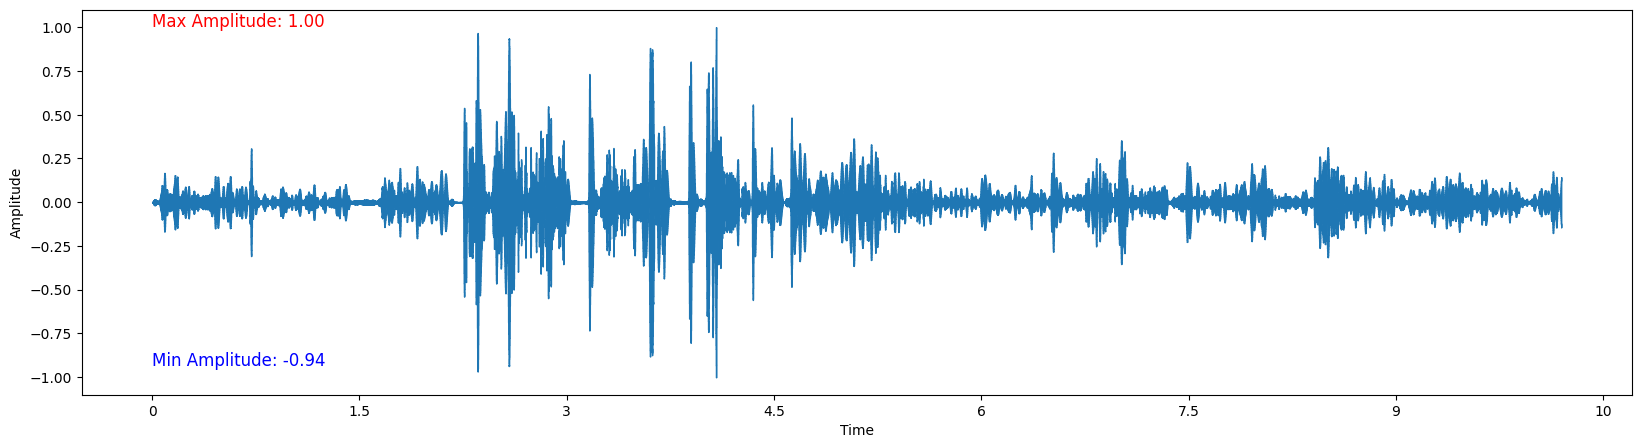

In [ ]:
amplitude_max = np.max(Bronkitis_sound_sample)
amplitude_min = np.min(Bronkitis_sound_sample)

plt.figure(figsize=(20,5))
librosa.display.waveshow(Bronkitis_sound_sample, sr = sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.text(0, amplitude_max, f'Max Amplitude: {amplitude_max:.2f}', fontsize=12, color='red')
plt.text(0, amplitude_min, f'Min Amplitude: {amplitude_min:.2f}', fontsize=12, color='blue')

plt.show()

### Spectrum

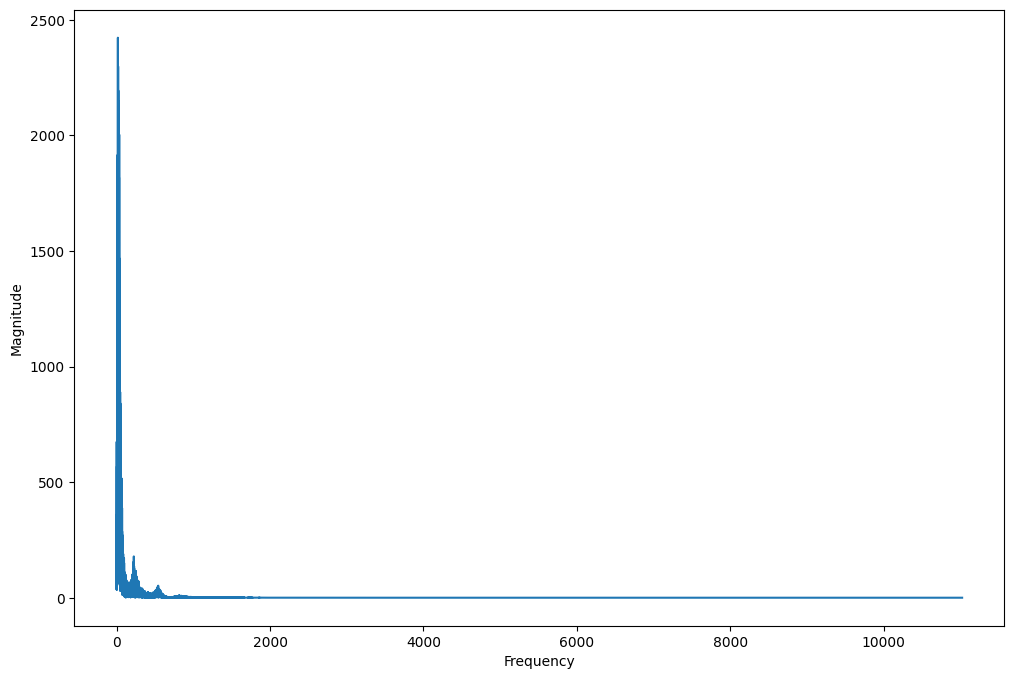

In [ ]:
fft_Bronkitis = np.fft.fft(Bronkitis_sound_sample)
magnitude_Bronkitis = np.abs(fft_Bronkitis)
freq_Bronkitis = np.linspace(0,sample_rate, len(magnitude_Bronkitis))
half_freq = freq_Bronkitis[:int(len(freq_Bronkitis)/2)]
half_magnitude = magnitude_Bronkitis[:int(len(freq_Bronkitis)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq,half_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

### Spectogram

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram')

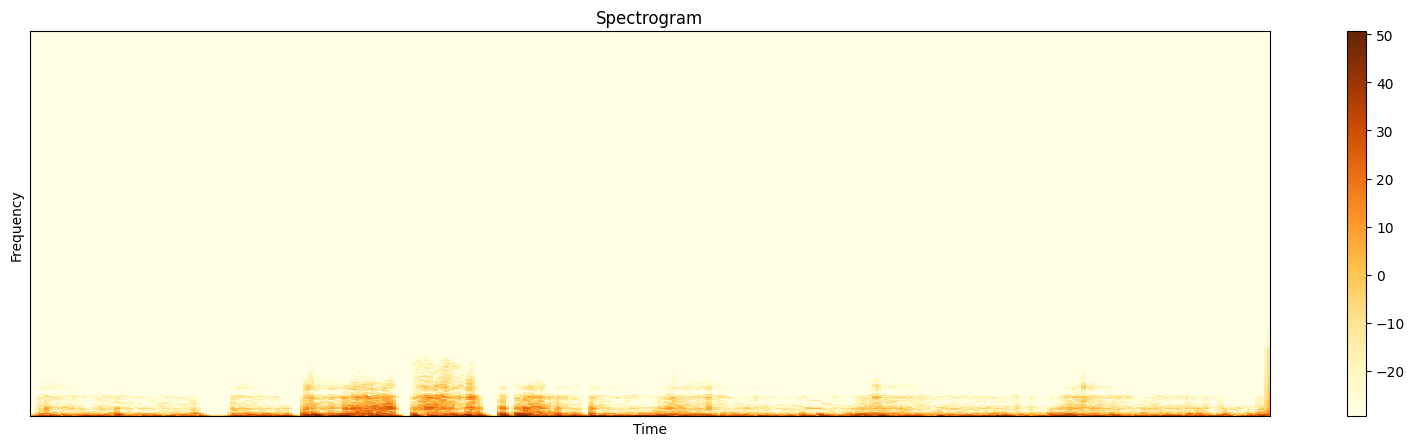

In [ ]:
# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft_Bronkitis = librosa.stft(Bronkitis_sound_sample, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft_Bronkitis)
log_spectrogram = librosa.amplitude_to_db(spectrogram)

# display spectrogram
plt.figure(figsize=(20,5))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.set_cmap("YlOrBr")
plt.title("Spectrogram")

### MFCCs

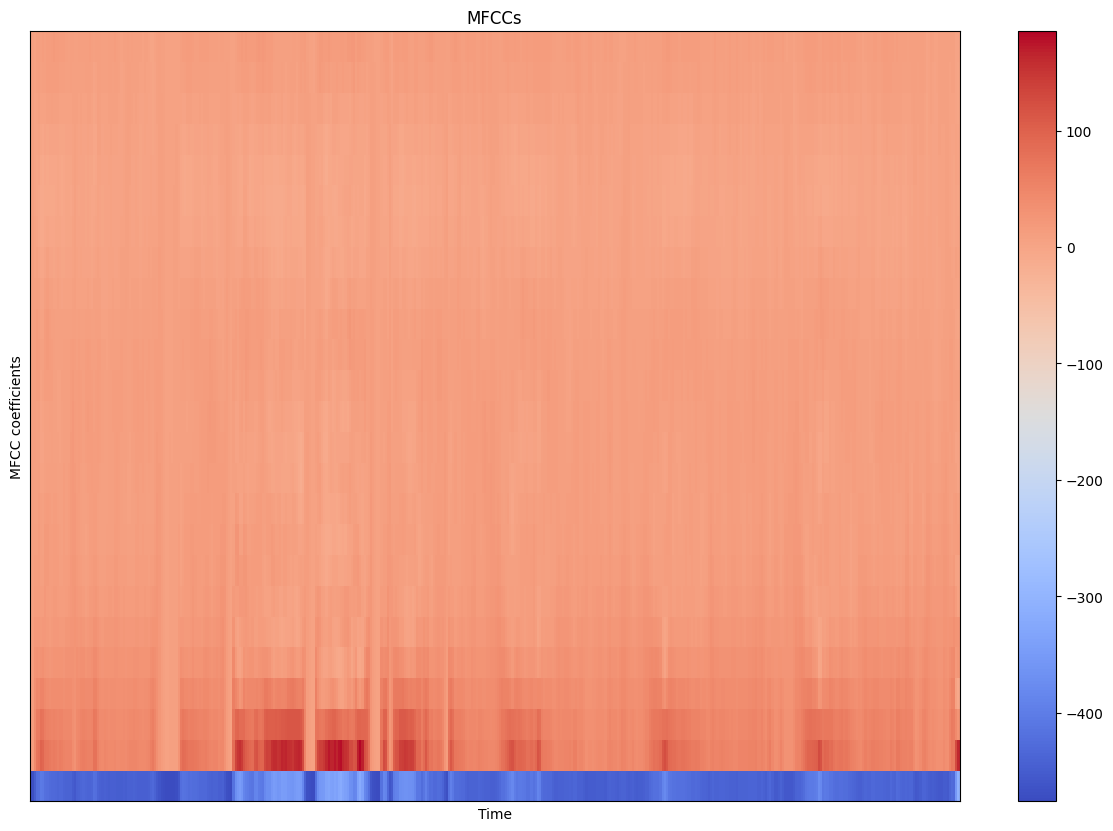

In [ ]:
# MFCCs
# extract 25 MFCCs
MFCCs = librosa.feature.mfcc(y=Bronkitis_sound_sample, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

# display MFCCs
plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
#plt.set_cmap("YlOrBr")
plt.title("MFCCs")

# show plots
plt.show()

## PNEUMONIA

In [ ]:
# Choose random soud from Pneumonia folder
random_Pneumonia= np.random.randint(0,len(os.listdir(train_Pneumonia_data)))
Pneumonia_sound = os.listdir(train_Pneumonia_data)[random_Pneumonia]
Pneumonia_sound_address = train_Pneumonia_data+Pneumonia_sound
Pneumonia_sound_sample,sample_rate = librosa.load(Pneumonia_sound_address)
ipd.Audio(Pneumonia_sound_sample,rate=sample_rate)

### Waveform

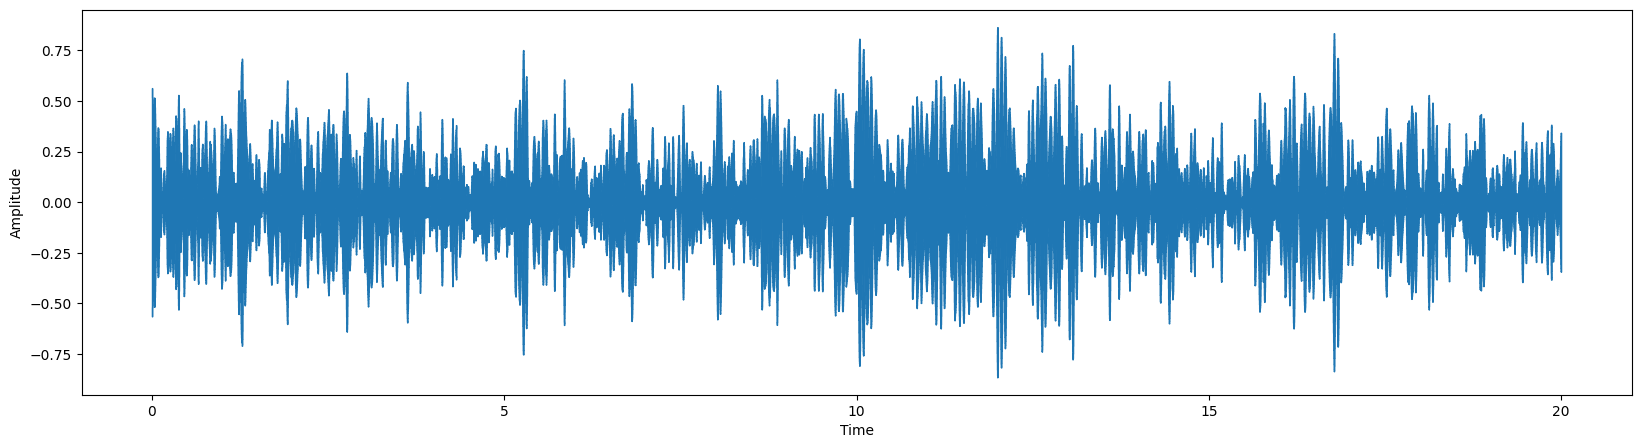

In [ ]:
plt.figure(figsize=(20,5))
librosa.display.waveshow(Pneumonia_sound_sample, sr = sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

### Spectrum

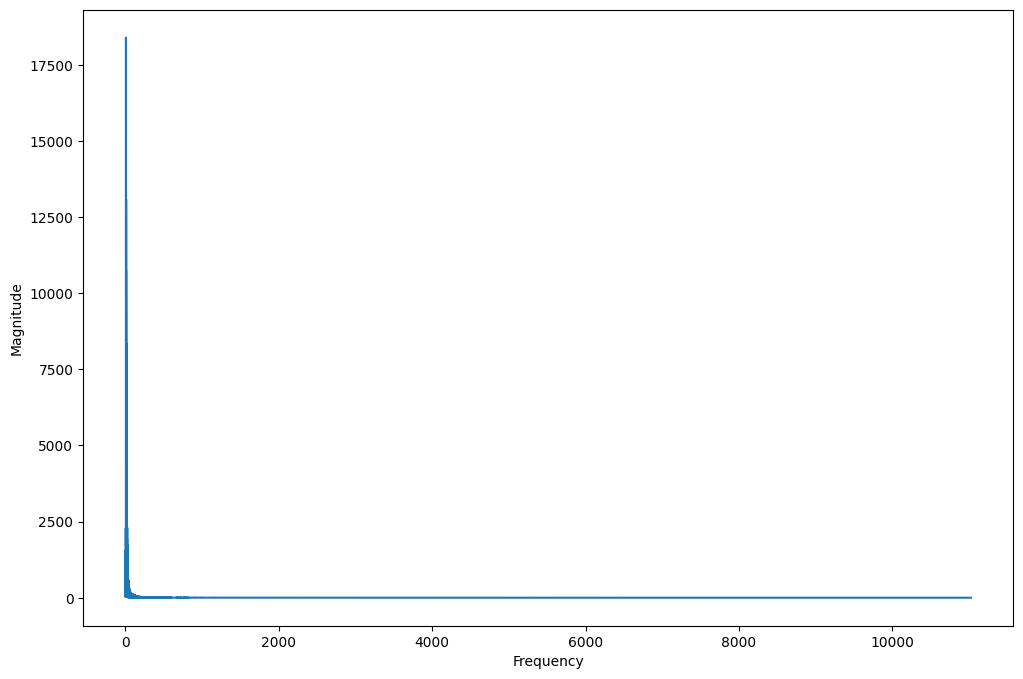

In [ ]:
fft_Pneumonia = np.fft.fft(Pneumonia_sound_sample)
magnitude_Pneumonia = np.abs(fft_Pneumonia)
freq_Pneumonia = np.linspace(0,sample_rate, len(magnitude_Pneumonia))
half_freq = freq_Pneumonia[:int(len(freq_Pneumonia)/2)]
half_magnitude = magnitude_Pneumonia[:int(len(freq_Pneumonia)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq,half_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

### Spectogram

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram')

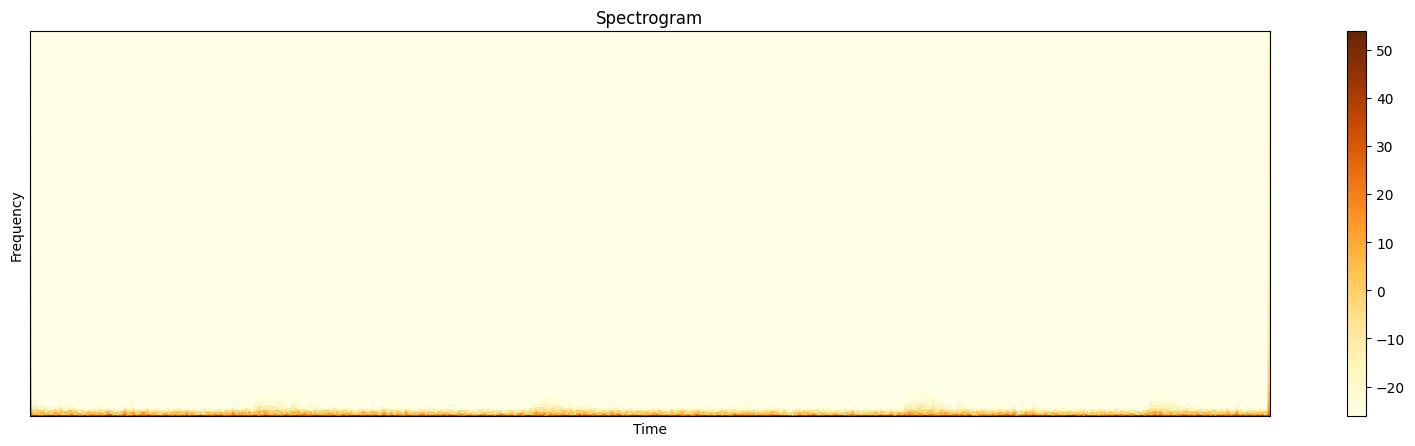

In [ ]:
# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft_Pneumonia = librosa.stft(Pneumonia_sound_sample, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft_Pneumonia)
log_spectrogram = librosa.amplitude_to_db(spectrogram)

# display spectrogram
plt.figure(figsize=(20,5))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.set_cmap("YlOrBr")
plt.title("Spectrogram")

### MFCCs

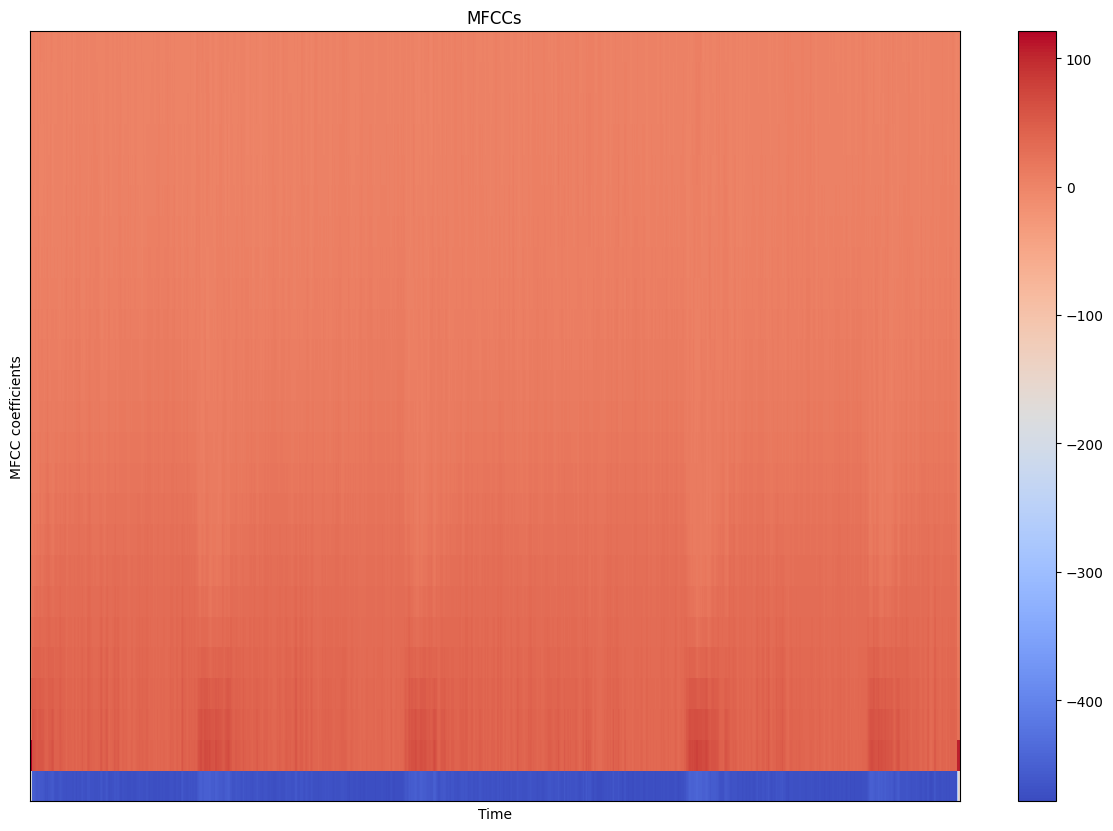

In [ ]:
# MFCCs
# extract 25 MFCCs
MFCCs = librosa.feature.mfcc(y=Pneumonia_sound_sample, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

# display MFCCs
plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
#plt.set_cmap("YlOrBr")
plt.title("MFCCs")

# show plots
plt.show()

#  preprocessing :

# Normalisasi

In [ ]:
# Fungsi untuk normalisasi menggunakan nilai puncak (peak value)
def peak_normalize(y):
    peak = np.max(np.abs(y))
    y_normalized = y / peak if peak != 0 else y
    return y

# Butter Band-Pass Filter

In [ ]:
# Fungsi untuk filtering menggunakan Butterworth band-pass filter
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

# Formant

In [ ]:
def extract_formants(y, sr):
    formants = []
    try:
        # Extract the fundamental frequency and harmonics
        f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=75, fmax=300, sr=sr)
        f0 = f0[~np.isnan(f0)]
        if len(f0) > 0:
            # Take mean of fundamental frequency as formant feature
            formants.append(np.mean(f0))
        else:
            formants.append(0)
    except Exception as e:
        print(f"Error extracting formants: {e}")
        formants.append(0)
    return formants

# Loading data

In [ ]:
# Fungsi untuk memuat data file dengan ekstraksi fitur dan melakukan pre-processing
def load_file_data(folder, file_names, duration=10, sr=22050):
    input_length = sr * duration

    data = []
    for file_name in file_names:
        try:
            sound_file = os.path.join(folder, file_name)
            print("load file ", sound_file)
            # Gunakan teknik kaiser_fast untuk ekstraksi yang lebih cepat
            X, sr = librosa.load(sound_file, sr=sr, duration=duration, res_type='kaiser_fast')
            dur = librosa.get_duration(y=X, sr=sr)
            # Pad audio file agar memiliki durasi yang sama
            if round(dur) < duration:
                print("fixing audio length:", file_name)
                X = librosa.util.fix_length(X, input_length)
            # Normalisasi dengan nilai puncak
            X = peak_normalize(X)
            # Filtering dengan band-pass filter
            X = butter_bandpass_filter(X, lowcut=250, highcut=2000, fs=sr, order=5)
            # Ekstraksi fitur MFCC dari data
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=25).T, axis=0)
            # Ekstraksi formant dari data
            formants = extract_formants(X, sr)
            # Menggabungkan MFCCs dan formants
            features = np.concatenate((mfccs, formants), axis=None)
            feature = np.array(features).reshape([-1,1])
            data.append(feature)
        except Exception as e:
            print("Error encountered while parsing file: ", file_name)
            features = np.zeros(26)  # 25 MFCCs + 1 formant
            feature = np.array(features).reshape([-1,1])
            data.append(feature)
    return data

## *Encoding*

In [ ]:
# simple encoding of categories, limited to 4 types
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Map label text to integer
CLASSES = ['Normal','Asthma','Bronkitis','Pneumonia']
NB_CLASSES=len(CLASSES)

# Map integer value to text labels
label_to_int = {k:v for v,k in enumerate(CLASSES)}
print (label_to_int)
print (" ")
# map integer to label text
int_to_label = {v:k for k,v in label_to_int.items()}
print(int_to_label)

{'Normal': 0, 'Asthma': 1, 'Bronkitis': 2, 'Pneumonia': 3}
 
{0: 'Normal', 1: 'Asthma', 2: 'Bronkitis', 3: 'Pneumonia'}


In [ ]:
# KHz
SAMPLE_RATE = 22050
# seconds
MAX_SOUND_CLIP_DURATION=10

Normal_files = fnmatch.filter(os.listdir(train_Normal_data), '*.wav')
Normal_sounds = load_file_data (folder=train_Normal_data, file_names = Normal_files, duration=MAX_SOUND_CLIP_DURATION)
Normal_labels = [0 for items in Normal_files]



print ("loaded dataset")


load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/train//Normal/BP100_N,N,P R M,70,F.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/train//Normal/BP109_N,N,P L M,26,M.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/train//Normal/BP102_N,N,P L L,41,M.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/train//Normal/BP103_N,N,P R U,81,F.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/train//Normal/BP84_N,N,A R U,65,F.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/train//Normal/BP48_N,N,P L U,31,M.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/train//Normal/BP76_N,N,A L U,31,M.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/train//Normal/BP51_N,N,P L M,30,M.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/train//Normal/BP71_N,N,P R U,36,M.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio

In [ ]:

Asthma_files = fnmatch.filter(os.listdir(train_Asthma_data), '*.wav')
Asthma_sounds = load_file_data(folder=train_Asthma_data,file_names=Asthma_files, duration=MAX_SOUND_CLIP_DURATION)
Asthma_labels = [1 for items in Asthma_sounds]


load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/train//Asthma/BP101_Asthma,E W,P L M,12,F.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/train//Asthma/BP104_Asthma,E W,P L U,45,F.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/train//Asthma/BP107_Asthma,E W,P L U,59,F.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/train//Asthma/BP106_Asthma,E W,P L U,45,F.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/train//Asthma/DP27_asthma,E W,P R M,53,F.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/train//Asthma/DP101_Asthma,E W,P L M,12,F.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/train//Asthma/BP2_Asthma,E W,P L L R,52,F.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/train//Asthma/DP15_Asthma,E W,P R U,49,F.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/train//Asthma/BP12_Asthma,E W,P L L,50,F

In [ ]:

Bronkitis_files = fnmatch.filter(os.listdir(train_Bronkitis_data), '*.wav')
Bronkitis_sounds = load_file_data(folder=train_Bronkitis_data,file_names=Bronkitis_files, duration=MAX_SOUND_CLIP_DURATION)
Bronkitis_labels = [2 for items in Bronkitis_sounds]


load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/train//Bronkitis/111_1b3_Tc_sc_Meditron.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/train//Bronkitis/111_1b2_Tc_sc_Meditron.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/train//Bronkitis/116_1b2_Pl_sc_Meditron.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/train//Bronkitis/116_1b2_Tc_sc_Meditron.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/train//Bronkitis/149_1b1_Pl_sc_Meditron.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/train//Bronkitis/149_1b1_Al_sc_Meditron.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/train//Bronkitis/149_1b1_Lr_sc_Meditron.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/train//Bronkitis/161_1b1_Pl_sc_Meditron.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/train//Bronkitis/161_1b1_Al_sc_Meditron.wav
load file 

In [ ]:

Pneumonia_files = fnmatch.filter(os.listdir(train_Pneumonia_data), '*.wav')
Pneumonia_sounds = load_file_data(folder=train_Pneumonia_data,file_names=Pneumonia_files, duration=MAX_SOUND_CLIP_DURATION)
Pneumonia_labels = [3 for items in Pneumonia_sounds]


load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/train//Pneumonia/122_2b1_Ar_mc_LittC2SE.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/train//Pneumonia/122_2b2_Ar_mc_LittC2SE.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/train//Pneumonia/122_2b2_Al_mc_LittC2SE.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/train//Pneumonia/122_2b1_Al_mc_LittC2SE.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/train//Pneumonia/122_2b1_Tc_mc_LittC2SE.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/train//Pneumonia/122_2b3_Ar_mc_LittC2SE.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/train//Pneumonia/122_2b2_Tc_mc_LittC2SE.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/train//Pneumonia/122_2b3_Tc_mc_LittC2SE.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/train//Pneumonia/122_2b3_Al_mc_LittC2SE.wav
load file 

In [ ]:
# test files
val_Normal_files = fnmatch.filter(os.listdir(val_Normal_data), '*.wav')
val_Normal_sounds = load_file_data(folder=val_Normal_data,file_names=val_Normal_files, duration=MAX_SOUND_CLIP_DURATION)
val_Normal_labels = [0 for items in val_Normal_sounds]


load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/val//Normal/BP32_N,N,A R L,30,M.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/val//Normal/BP49_N,N,P R M,21,M.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/val//Normal/BP50_N,N,P R L ,27,M.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/val//Normal/BP48_N,N,P L U,31,M.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/val//Normal/DP30_N,N,P R M,18,F.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/val//Normal/BP31_N,N,P L M,27,F.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/val//Normal/BP30_N,N,P R M,18,F.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/val//Normal/EP31_N,N,P L M,27,F.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/val//Normal/EP30_N,N,P R M,18,F.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/val//Normal/EP5

In [ ]:
val_Asthma_files = fnmatch.filter(os.listdir(val_Asthma_data), '*.wav')
val_Asthma_sounds = load_file_data(folder=val_Asthma_data,file_names=val_Asthma_files, duration=MAX_SOUND_CLIP_DURATION)
val_Asthma_labels = [1 for items in val_Asthma_sounds]

print ("loaded test dataset")

load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/val//Asthma/BP2_Asthma,E W,P L L R,52,F.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/val//Asthma/DP2_Asthma,E W,P L L R,52,F.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/val//Asthma/BP1_Asthma,I E W,P L L,70,M.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/val//Asthma/BP12_Asthma,E W,P L L,50,F.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/val//Asthma/BP10_Asthma,E W,P R U,59,M.wav
fixing audio length: BP10_Asthma,E W,P R U,59,M.wav
Error encountered while parsing file:  BP10_Asthma,E W,P R U,59,M.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/val//Asthma/DP10_Asthma,E W,P R U,59,M.wav
fixing audio length: DP10_Asthma,E W,P R U,59,M.wav
Error encountered while parsing file:  DP10_Asthma,E W,P R U,59,M.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/val//Asthma/BP3_Asthma,I E W,P L 

In [ ]:
val_Bronkitis_files = fnmatch.filter(os.listdir(val_Bronkitis_data), '*.wav')
val_Bronkitis_sounds = load_file_data(folder=val_Bronkitis_data,file_names=val_Bronkitis_files, duration=MAX_SOUND_CLIP_DURATION)
val_Bronkitis_labels = [2 for items in val_Bronkitis_sounds]

print ("loaded test dataset")

load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/val//Bronkitis/BP22_BRON,Crep,P R U,24,M.wav
fixing audio length: BP22_BRON,Crep,P R U,24,M.wav
Error encountered while parsing file:  BP22_BRON,Crep,P R U,24,M.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/val//Bronkitis/DP22_BRON,Crep,P R U,24,M.wav
fixing audio length: DP22_BRON,Crep,P R U,24,M.wav
Error encountered while parsing file:  DP22_BRON,Crep,P R U,24,M.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/val//Bronkitis/BP21_BRON,Crep,P R L ,20,M(2).wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/val//Bronkitis/BP28_BRON,Crep,P L U,68,F(2).wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/val//Bronkitis/DP21_BRON,Crep,P R L ,20,M(2).wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/val//Bronkitis/DP28_BRON,Crep,P L U,68,F(2).wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/val//Bronkitis

In [ ]:
val_Pneumonia_files = fnmatch.filter(os.listdir(val_Pneumonia_data), '*.wav')
val_Pneumonia_sounds = load_file_data(folder=val_Pneumonia_data,file_names=val_Pneumonia_files, duration=MAX_SOUND_CLIP_DURATION)
val_Pneumonia_labels = [3 for items in val_Pneumonia_sounds]

print ("loaded test dataset")

load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/val//Pneumonia/226_1b1_Al_sc_Meditron.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/val//Pneumonia/BP41_pneumonia,Crep,P R M,51,M.wav
fixing audio length: BP41_pneumonia,Crep,P R M,51,M.wav
Error encountered while parsing file:  BP41_pneumonia,Crep,P R M,51,M.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/val//Pneumonia/BP37_pneumonia,Crep,A R L,70,F.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/val//Pneumonia/EP37_pneumonia,Crep,A R L,70,F.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/val//Pneumonia/EP41_pneumonia,Crep,P R M,51,M.wav
fixing audio length: EP41_pneumonia,Crep,P R M,51,M.wav
Error encountered while parsing file:  EP41_pneumonia,Crep,P R M,51,M.wav
load file  /content/drive/MyDrive/lung-dataset/Dataset Audio(val)/val//Pneumonia/DP41_pneumonia,Crep,P R M,51,M.wav
fixing audio length: DP41_pneumonia,Crep,P R M,51,M.

## *concatenation*

In [ ]:
x_data = np.concatenate((Normal_sounds, Asthma_sounds, Bronkitis_sounds, Pneumonia_sounds))

y_data = np.concatenate((Normal_labels, Asthma_labels, Bronkitis_labels, Pneumonia_labels))

test_x = np.concatenate((val_Normal_sounds,val_Asthma_sounds,Bronkitis_sounds,val_Pneumonia_sounds))

test_y = np.concatenate((val_Normal_labels,val_Asthma_labels,val_Bronkitis_labels,val_Pneumonia_labels))

print ("combined training data record: ",len(y_data), len(test_y))

combined training data record:  396 81


## *train_test_validation split*



In [ ]:
# shuffle - whether or not to shuffle the data before splitting. If shuffle=False then stratify must be None.
# random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.

seed = 100
# split data into Train, Validation and Test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.8, test_size=0.2, random_state=seed, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, test_size=0.2, random_state=seed, shuffle=True)

# One-Hot encoding for classes
y_train = np.array(tf.keras.utils.to_categorical(y_train, len(CLASSES)))
y_test = np.array(tf.keras.utils.to_categorical(y_test, len(CLASSES)))
y_val = np.array(tf.keras.utils.to_categorical(y_val, len(CLASSES)))
test_y=np.array(tf.keras.utils.to_categorical(test_y, len(CLASSES)))

In [ ]:
# Fungsi untuk menampilkan array numpy untuk tiap kelas
def display_class_features(x_data, y_data, label_to_int):
    # Pisahkan data berdasarkan kelas
    classes = label_to_int.keys()
    for class_label in classes:
        class_index = label_to_int[class_label]
        class_data = x_data[y_data == class_index]
        print(f"Fitur untuk kelas {class_label}:")
        print(class_data)
        print("\n")

# Konversi list fitur dan label ke array numpy
x_data = np.array(x_data)
y_data = np.array(y_data)

# Tampilkan array numpy untuk tiap kelas
display_class_features(x_data, y_data, label_to_int)

Fitur untuk kelas Normal:
[[[-860.22210745]
  [ 121.55009284]
  [  59.92232785]
  ...
  [   6.05058696]
  [   5.99431974]
  [ 262.21414252]]

 [[-909.97917586]
  [ 110.31814007]
  [  39.64943353]
  ...
  [   5.86233226]
  [   5.90355536]
  [ 251.59146948]]

 [[-968.00335169]
  [ 122.1215276 ]
  [  24.15775361]
  ...
  [   5.29583835]
  [   3.77018211]
  [ 254.2513276 ]]

 ...

 [[-698.14345513]
  [ 173.11255084]
  [  39.00559167]
  ...
  [   5.67396657]
  [   3.81819023]
  [   0.        ]]

 [[-638.57082186]
  [ 176.47802522]
  [  60.27904559]
  ...
  [   4.63612411]
  [   6.92514914]
  [ 288.28925136]]

 [[-706.91723213]
  [ 191.20253444]
  [  50.66195106]
  ...
  [   6.62472907]
  [   6.59803666]
  [ 193.72801904]]]


Fitur untuk kelas Asthma:
[[[-860.22210745]
  [ 121.55009284]
  [  59.92232785]
  ...
  [   6.05058696]
  [   5.99431974]
  [ 262.21414252]]

 [[-919.05491333]
  [ 113.54261013]
  [  38.60401921]
  ...
  [   6.36156825]
  [   6.09487245]
  [ 255.12310493]]

 [[-983.3880

In [ ]:
print ("label shape: ", y_data.shape)
print ("data size of the array: : %s" % y_data.size)
print ("length of one array element in bytes: ", y_data.itemsize)
print ("total bytes consumed by the elements of the array: ", y_data.nbytes)
print (y_data[1])
print ("")
print ("audio data shape: ", x_data.shape)
print ("data size of the array: : %s" % x_data.size)
print ("length of one array element in bytes: ", x_data.itemsize)
print ("total bytes consumed by the elements of the array: ", x_data.nbytes)
print ("")
print ("training data shape: ", x_train.shape)
print ("training label shape: ", y_train.shape)
print ("")
print ("validation data shape: ", x_val.shape)
print ("validation label shape: ", y_val.shape)
print ("")
print ("test data shape: ", x_test.shape)
print ("test label shape: ", y_test.shape)

label shape:  (396,)
data size of the array: : 396
length of one array element in bytes:  8
total bytes consumed by the elements of the array:  3168
0

audio data shape:  (396, 26, 1)
data size of the array: : 10296
length of one array element in bytes:  8
total bytes consumed by the elements of the array:  82368

training data shape:  (252, 26, 1)
training label shape:  (252, 4)

validation data shape:  (64, 26, 1)
validation label shape:  (64, 4)

test data shape:  (80, 26, 1)
test label shape:  (80, 4)



## *Correct imbalnced data using class weight*


In [ ]:
TRAIN_IMG_COUNT = 396
COUNT_0 = 105  #normal
COUNT_1 = 99 #asthma
COUNT_2 = 95 #bronkitis
COUNT_3 = 97 #pneumonia
weight_for_0 = TRAIN_IMG_COUNT / (4 * COUNT_0)
weight_for_1 = TRAIN_IMG_COUNT / (4 * COUNT_1)
weight_for_2 = TRAIN_IMG_COUNT / (4 * COUNT_2)
weight_for_3 = TRAIN_IMG_COUNT / (4 * COUNT_3)
class_weight = {0: weight_for_0, 1: weight_for_1,2: weight_for_2, 3: weight_for_3}
class_weight

{0: 0.9428571428571428, 1: 1.0, 2: 1.0421052631578946, 3: 1.0206185567010309}

# LSTM Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, LSTM, Bidirectional
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint,TensorBoard,ProgbarLogger
#from tensorflow.keras.utils import np_utils
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import itertools

In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(128, dropout=0.05, recurrent_dropout=0.20, return_sequences=True), input_shape = (26,1)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Flatten())

model.add(Dense(4, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['acc'])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 26, 256)           133120    
 al)                                                             
                                                                 
 dense (Dense)               (None, 26, 128)           32896     
                                                                 
 dense_1 (Dense)             (None, 26, 64)            8256      
                                                                 
 dropout (Dropout)           (None, 26, 64)            0         
                                                                 
 dense_2 (Dense)             (None, 26, 32)            2080      
                                                                 
 dense_3 (Dense)             (None, 26, 32)            1056      
                                                        

In [ ]:
print ("training started..... please wait.")
# training
history=model.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_val, y_val))

print ("training finised!")

training started..... please wait.
Epoch 1/20
16/16 [==============================] - 9s 142ms/step - loss: 1.4005 - acc: 0.2341 - val_loss: 1.3884 - val_acc: 0.2344
Epoch 2/20
16/16 [==============================] - 2s 96ms/step - loss: 1.3697 - acc: 0.3056 - val_loss: 1.3821 - val_acc: 0.2344
Epoch 3/20
16/16 [==============================] - 3s 172ms/step - loss: 1.3656 - acc: 0.2897 - val_loss: 1.3709 - val_acc: 0.2344
Epoch 4/20
16/16 [==============================] - 3s 180ms/step - loss: 1.3683 - acc: 0.3016 - val_loss: 1.3455 - val_acc: 0.2500
Epoch 5/20
16/16 [==============================] - 2s 108ms/step - loss: 1.3421 - acc: 0.3611 - val_loss: 1.3181 - val_acc: 0.3594
Epoch 6/20
16/16 [==============================] - 2s 109ms/step - loss: 1.3196 - acc: 0.3810 - val_loss: 1.2862 - val_acc: 0.3125
Epoch 7/20
16/16 [==============================] - 2s 102ms/step - loss: 1.2979 - acc: 0.3889 - val_loss: 1.2421 - val_acc: 0.3438
Epoch 8/20
16/16 [========================

<Axes: >

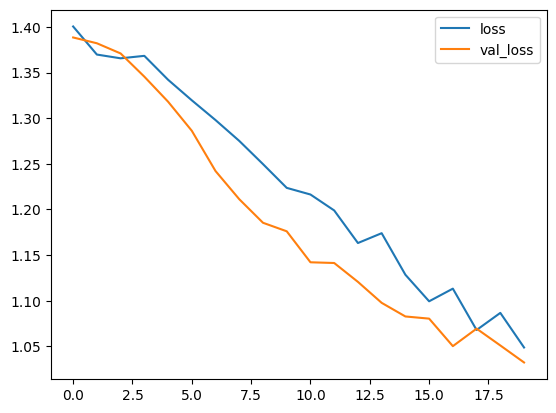

In [ ]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

<Axes: >

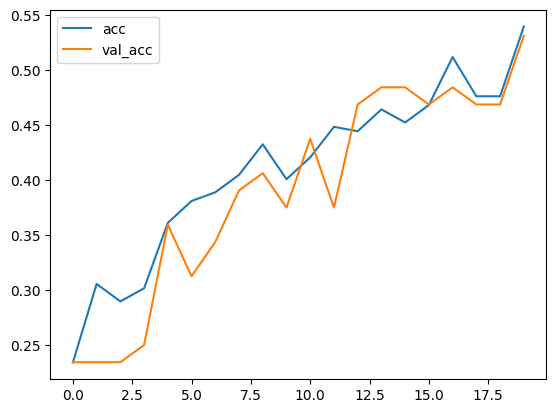

In [ ]:
losses[['acc','val_acc']].plot()

# prediction


In [ ]:
# make a prediction
y_pred = model.predict(x_test, batch_size=5)
#check scores
scores = model.evaluate(x_test, y_test)
print ("Model evaluation accuracy: ", round(scores[1]*100),"%")

3/3 [==============================] - 1s 20ms/step - loss: 0.9371 - acc: 0.6000
Model evaluation accuracy:  60 %


# saving and loading model

In [ ]:
model.save("lung_sound_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
y_pred = np.asarray(model.predict(x_test, batch_size=16))
y_pred = np.argmax(y_pred,axis=1)

5/5 [==============================] - 1s 14ms/step


In [ ]:
target_names = ["Normal", "Asthma","Bronkitis","Pneumonia"]
print(classification_report(y_test.argmax(axis=1), y_pred, target_names = target_names))


              precision    recall  f1-score   support

      Normal       0.41      0.94      0.58        18
      Asthma       0.78      0.33      0.47        21
   Bronkitis       0.68      0.72      0.70        18
   Pneumonia       1.00      0.48      0.65        23

    accuracy                           0.60        80
   macro avg       0.72      0.62      0.60        80
weighted avg       0.74      0.60      0.60        80



In [ ]:
import os
import numpy as np
import librosa
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from scipy.signal import butter, filtfilt


# Fungsi untuk normalisasi menggunakan nilai puncak (peak value)
def peak_normalize(y):
    peak = np.max(np.abs(y))
    y_normalized = y / peak if peak != 0 else y
    return y

# Fungsi untuk filtering menggunakan Butterworth band-pass filter
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

# Fungsi ekstraksi formant
def extract_formants(y, sr):
    formants = []
    try:
        # Extract the fundamental frequency and harmonics
        f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=75, fmax=300, sr=sr)
        f0 = f0[~np.isnan(f0)]
        if len(f0) > 0:
            # Take mean of fundamental frequency as formant feature
            formants.append(np.mean(f0))
        else:
            formants.append(0)
    except Exception as e:
        print(f"Error extracting formants: {e}")
        formants.append(0)
    return formants

# Fungsi untuk memuat dan memproses file audio serta ekstraksi fitur MFCC dan formant
def preprocess_audio(audio_path, duration=10, sr=22050):
    input_length = sr * duration
    try:
        X, sr = librosa.load(audio_path, sr=sr, duration=duration, res_type='kaiser_fast')
        dur = librosa.get_duration(y=X, sr=sr)
        if round(dur) < duration:
            X = librosa.util.fix_length(X, input_length)
        # Normalisasi dengan nilai puncak
        X = peak_normalize(X)
        # Filtering dengan band-pass filter
        X = butter_bandpass_filter(X, lowcut=250, highcut=2000, fs=sr, order=5)
        # Ekstraksi fitur MFCC dari data
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=25).T, axis=0)
        # Ekstraksi formant dari data
        formants = extract_formants(X, sr)
        # Menggabungkan MFCCs dan formants
        features = np.concatenate((mfccs, formants), axis=None)
    except Exception as e:
        print(f"Error encountered while parsing file: {audio_path}: {e}")
        features = np.zeros(26)  # 25 MFCCs + 1 formant
    return features

# Muat model yang telah dilatih
model = tf.keras.models.load_model("lung_sound_model.h5")

# Path ke file audio baru
new_audio_path = "/content/drive/MyDrive/lung-dataset/Dataset Audio(val)/val/Pneumonia/191_2b1_Pl_mc_LittC2SE(2).wav"

# Proses file audio baru
new_audio_feature = preprocess_audio(new_audio_path)
new_audio_feature = np.expand_dims(new_audio_feature, axis=0)

# Prediksi kelas file audio baru
prediction = model.predict(new_audio_feature)
predicted_class = np.argmax(prediction, axis=1)
predicted_label = CLASSES[predicted_class[0]]

print(f"Kelas yang diprediksi untuk file audio adalah: {predicted_label}")


1/1 [==============================] - 1s 571ms/step
Kelas yang diprediksi untuk file audio adalah: Pneumonia
